 Лабораторная работа №1 - Персептроны. Процедура обучения Розенблатта

Выполнил: Степанов Данила Михайлович

Группа: М8О-407Б-20

Вариант: 22

Цель работы

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

Решение

Подключим модуль torch для определения архитектуры модели

In [1]:
import torch
from torch import nn
import numpy as np

Часть 1 - двумерные признаки, одномерные метки

С помощью модуля torch описываем свою модель нейронной сети. Определяем её параметры и определяем вычисления выходных значений по входным данным.:

In [2]:
class Perceptron(nn.Module):
  def __init__(self, in_features, out_features): # описываем линейный слой: на входе матрица объекты-признаки размера n x in_features, на выходе n x out_features
    super().__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.randn(out_features))

  def forward(self, x): # прямой проход нейросети
    x = x @ self.weights
    x += self.bias
    return x

# (n x in_features) * (in_features x out_features) = (n x out_features)

Подготивим данные для обучения

In [3]:
X = torch.tensor([[-2.1, -4.6], # n x in_features
                  [0, 2.6],
                  [1.3, -4.2],
                  [-4.2, 2.7],
                  [4, 0.3],
                  [-4, 3.2]])

y = torch.tensor(np.array([0, 0, 0, 1, 0, 1]))

Определим число итераций обучения, модель, функцию потерь, оптимизатор для изменения параметров сети и процедуру обучения сети

In [4]:
epochs = 40000

model = Perceptron(2, 1)
criterion = nn.L1Loss()
opt = torch.optim.SGD(model.parameters(), lr=0.03)

def train(model, criterion, opt, epochs):
  for epoch in range(epochs):
    opt.zero_grad()
    outputs = model(X)
    sigm = nn.Sigmoid()
    probs = sigm(outputs).view(-1)
    loss = criterion(probs, y)
    if epoch % 10000 == 0:
      print("loss: ", loss.item())
    loss.backward()
    opt.step()

train(model, criterion, opt, epochs)

loss:  0.7732027173042297
loss:  0.008312579244375229
loss:  0.003855440765619278
loss:  0.0024989889934659004


Подключим модуль для отрисовки графиков

In [5]:
import matplotlib.pyplot as plt

Отрисовка разделяющей прямой и точек

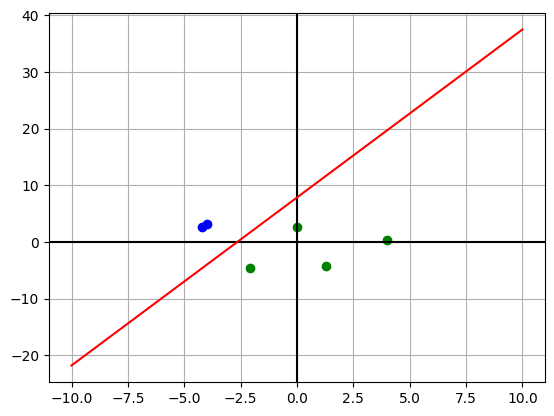

In [6]:
def discriminant(x, w, b):
    return (-x * w[0].item() - b.item()) / w[1].item() # w1y + w0x + b = 0 -> y = (-b - w0x) / w1

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

_X = np.linspace(-10, 10, 100)
Y = [-4.6, 2.6, -4.2, 2.7, 0.3, 3.2]

X = [-2.1, 0, 1.3, -4.2, 4, -4]

plt.plot(_X, discriminant(_X, model.weights, model.bias), "red")

y = [0, 0, 0, 1, 0, 1]

for p1, p2, c in list(zip(X, Y, y)):
    if (c == 1):
        plt.scatter(p1, p2, c="blue")
    else:
        plt.scatter(p1, p2, c="green")

plt.show() # y = kx + b

Часть 2 - двумерные признаки, двумерные метки

Обучим модель для классификации на 4 класса, не меняя архитектуру модели и меняя только процедуру обучения

In [8]:
model2 = Perceptron(2, 2)

criterion = nn.L1Loss()
opt = torch.optim.SGD(model2.parameters(), lr=0.05)

y1 = torch.tensor([1, 1, 1, 0, 0, 1, 1, 0])
y2 = torch.tensor([1, 1, 1, 0, 1, 0, 1, 0])

X = torch.tensor([[1.3, 4.5],
                  [-2.6, 1.7],
                 [-2.2, 1.7],
                  [1.9, -4.4],
                  [-2.5, -2.8],
                  [1.6, 3.4],
                  [-1.6, 2.8],
                  [1.7, -5]])

epochs = 10000

for epoch in range(epochs):
  opt.zero_grad()
  outputs = model2(X) # n x 2
  sigm = nn.Sigmoid()
  outputs = sigm(outputs)
  probs1 = outputs[:, 0]
  probs2 = outputs[:, 1]
  loss1 = criterion(probs1, y1)
  loss2 = criterion(probs2, y2)
  loss = loss1 + loss2
  if epoch % 1000 == 0:
    print("loss: ", loss.item())
  loss.backward()
  opt.step()

loss:  0.44763612747192383
loss:  0.08350858092308044
loss:  0.06563188135623932
loss:  0.05317588523030281
loss:  0.04400360956788063
loss:  0.03712758421897888
loss:  0.031874749809503555
loss:  0.027782017365098
loss:  0.024531858041882515
loss:  0.021904805675148964


Отрисовка разделяющих гиперплоскостей и точек

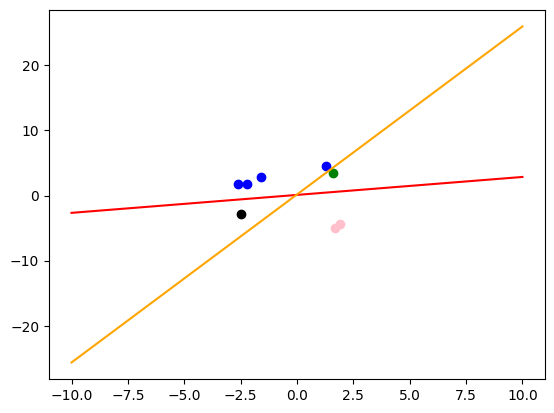

In [9]:
_X = np.linspace(-10, 10, 100)

plt.plot(_X, discriminant(_X, model2.weights[:, 0], model2.bias[0]), "red")
plt.plot(_X, discriminant(_X, model2.weights[:, 1], model2.bias[1]), "orange")

x = np.array(X[:, 0])
y = np.array(X[:, 1])

labels = zip(y1, y2)

for p1, p2, l in list(zip(x, y, labels)):
    if l[0] == 1 and l[1] == 1:
        plt.scatter(p1, p2, c="blue")
    elif l[0] == 1:
        plt.scatter(p1, p2, c="green") # 00 10 | 10 11
    elif l[1] == 1:
        plt.scatter(p1, p2, c="black")
    else:
        plt.scatter(p1, p2, c="pink")

plt.show()

#Выводы
В данной лабораторной работе я познакомился с персептроном Розенблатта и обучил его на заданных данных. Так как данные были линейно разделимы, такая модель смогла идеально разделить объекты на два класса. Для решения 2 части задания понадобилось две разделяющие прямые, чтобы классифицировать объекты на 4 класса.